# 1 - Inteligência Computacional:

A Inteligência Computacional (IC) é um ramo da Inteligência Artificial (IA) que se concentra no desenvolvimento de algoritmos que simulam o comportamento inteligente. Essa área de pesquisa está crescendo em popularidade à medida que a tecnologia evolui e as empresas procuram novas formas de usar a IA para melhorar seus negócios. Na mineração de dados, a IC é frequentemente usada para identificar padrões complexos em grandes conjuntos de dados.

Entre os métodos de IC mais utilizados na mineração de dados estão:

``Redes neurais artificiais``: modelo computacional que se inspira na estrutura e no funcionamento do cérebro humano, capaz de aprender a partir de exemplos e identificar padrões em grandes volumes de dados.

``Algoritmos genéticos``: método de otimização inspirado na evolução natural, que utiliza a seleção natural, a reprodução e a mutação para encontrar soluções melhores para um problema.

``Lógica fuzzy``: técnica que permite lidar com informações imprecisas ou incertas, atribuindo graus de pertinência a cada valor.

### 1.1 - Redes Neurais Artificiais

As redes neurais artificiais (RNA) são um tipo de modelo de IC que se baseia na estrutura do cérebro humano. Elas são usadas para reconhecer padrões em dados, classificar imagens, processar linguagem natural e muito mais. Uma RNA é composta por camadas de neurônios interconectados que realizam operações matemáticas em dados de entrada e geram uma saída. As redes neurais são treinadas usando um algoritmo de aprendizado para ajustar os pesos das conexões entre os neurônios e melhorar a precisão do modelo.

Como já vimos anteriormente, uma rede neural possui 3 tipos de camada, sendo:
- ``Camada de entrada`` (input Layer) : Toda rede neural possui apenas 1 camada desta e possui a mesma quantidade de neurônios que a quantidade de atributos da base de dados
- `Camada Oculta` : Toda rede neural possui 1 ou mais destas camadas e a função de ativação depende de acordo com o problema a ser resolvido. Nesta camada podemos definir:
    - ``A quantidade de neurônios`` (não existe uma quantidade ideal);
    - ``Função de ativação``: define a função matemática usada para aplicar um valor de saída a cada neurônio na camada oculta;
    - ``Regularização``: permite adicionar penalidades aos pesos da camada para evitar o overfitting;
    - ``Dropout``: permite desativar aleatoriamente alguns neurônios durante o treinamento para evitar o overfitting;
    - ``Dropout``: permite desativar aleatoriamente alguns neurônios durante o treinamento para evitar o overfitting;
    - ``Bias``: indica se deve haver um termo de bias (viés) adicionado a cada neurônio na camada oculta.

- `Camada de saída` : Toda rede neural possui apenas 1 camada desta e a quantidade de neurônios vai depender do tipo de problema a ser resolvido. Nesta camada podemos definir:
    - ``Número de neurônios``: define o número de unidades de processamento na camada de saída. Isso é geralmente determinado pelo número de classes em um problema de classificação ou pelo número de valores de saída em um problema de regressão.
    - ``Função de ativação``: define a função matemática usada para aplicar um valor de saída a cada neurônio na camada de saída.


Como escolher a camada de ativação:

https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

Na camada de entrada cada neurônio irá receber um atributo referente ao vetor de atributos.

Após a camada de entrada a rede neural é composta por pesos (o que chamamos de inteligência da rede), e os neurônios em seguida são formados por duas partes, uma função soma e uma função de ativação.

O que diferencia um aprendizado de máquina para um aprendizado profundo (deep learning) é a quantidade de camadas ocultas.

Uma das funções de ativação disponíveis:

A Função de Ativação ReLU, age da seguinte forma: enquanto o valor da função soma for menor que zero, será retornado 0 na saída do neurônio. Após o valor ser maior ou igual a zero, a função ativa o neurônio e retorna o próprio valor da função soma.

#### Existe alguma regra para as funções de ativação?
Não é uma regra, mas geralmente se utiliza apenas 1 tipo de função de ativação em todas as camadas ocultas.

E como escolher a função de ativação das camadas ocultas? Bem, no geral, a função de ativação ReLU performa melhores que as outras...

E na camada da saída?

Ai já muda de acordo com o que estamos querendo prever:

- `Sigmoid`: Para problemas de classificação binários ou classificação de apenas uma classe dentre várias possíveis classes;

- `Softmax`: Para problemas de classificação com várias classes;

- `Linear`: Para regressões.

In [ ]:
# Importar as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Preparar os dados
df = pd.read_csv('casas_boston.csv')
X = df.iloc[:, :-1]
y = df[['valor']]

scaler_features =  MinMaxScaler()
scaler_features.fit(X)
X = scaler_features.transform(X)

scaler_target =  MinMaxScaler()
scaler_target.fit(y)
y = scaler_target.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo com função de ativação relu
model_relu = Sequential()
model_relu.add(InputLayer(input_shape=(X_train.shape[1],)))
model_relu.add(Dense(50, activation='relu'))
model_relu.add(Dense(50, activation='relu'))
model_relu.add(Dense(50, activation='relu'))
model_relu.add(Dense(50, activation='relu'))
model_relu.add(Dense(50, activation='relu'))
model_relu.add(Dense(1, activation='linear'))
model_relu.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model_relu.fit(X_train, y_train, epochs=150, batch_size=10, verbose = 0)

In [ ]:
# Modelo com função de ativação softplus
model_softplus = Sequential()
model_softplus.add(InputLayer(input_shape=(X_train.shape[1],)))
model_softplus.add(Dense(50, activation='softplus'))
model_softplus.add(Dense(50, activation='softplus'))
model_softplus.add(Dense(50, activation='softplus'))
model_softplus.add(Dense(50, activation='softplus'))
model_softplus.add(Dense(50, activation='softplus'))
model_softplus.add(Dense(1, activation='linear'))
model_softplus.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model_softplus.fit(X_train, y_train, epochs=150, batch_size=10, verbose = 0)

In [ ]:
# Modelo sem função de ativação
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose = 0)

In [ ]:
# Realiza predição de X_test com os 4 modelos
predict_relu = model_relu.predict(X_test)
predict_softplus = model_softplus.predict(X_test)
predict = model.predict(X_test)

predict_relu = scaler_target.inverse_transform(predict_relu)
predict_softplus = scaler_target.inverse_transform(predict_softplus)
predict = scaler_target.inverse_transform(predict)
real = scaler_target.inverse_transform(y_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# Erro médio quadrático - MSE
mse_relu = mean_squared_error(real, predict_relu)
print("Mean squared error ReLU: ", mse_relu)

mse_softplus = mean_squared_error(real, predict_softplus)
print("Mean squared error Softplus: ", mse_softplus)

mse = mean_squared_error(real, predict)
print("Mean squared error Sem função de ativação: ", mse)

Mean squared error ReLU:  8255058.516256304
Mean squared error Softplus:  15207501.17941274
Mean squared error Sem função de ativação:  25871869.91990052


In [ ]:
# Criar um dataframe com os valores e ordenar pelo real
df_predict = pd.DataFrame()
df_predict['real'] = real.flatten()
df_predict['relu'] = predict_relu.flatten()
df_predict['softplus'] = predict_softplus.flatten()
df_predict['sem'] = predict.flatten()
df_predict.sort_values(by='real', inplace = True)

In [ ]:
df_predict['real']

75     5000.0
12     7000.0
79     7000.0
98     9600.0
83     9700.0
       ...   
54    43500.0
77    48500.0
96    50000.0
42    50000.0
18    50000.0
Name: real, Length: 102, dtype: float64

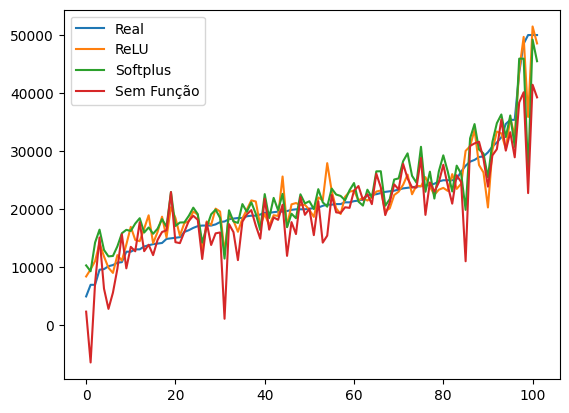

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(df_predict)), df_predict[['real']], label = 'Real')
plt.plot(range(0,len(df_predict)), df_predict[['relu']], label = 'ReLU')
plt.plot(range(0,len(df_predict)), df_predict[['softplus']], label = 'Softplus')
plt.plot(range(0,len(df_predict)), df_predict[['sem']], label = 'Sem Função')
plt.legend()
plt.show()

### 1.2 Algoritmos Genéticos

Os Algoritmos Genéticos (AGs) são uma técnica poderosa de otimização inspirada no processo evolutivo da seleção natural. Eles são úteis em problemas complexos de otimização e são implementados em Python por bibliotecas como a DEAP e a Scikit-learn. Os AGs apresentam limitações, como a possibilidade de convergir para soluções subótimas e dependem da qualidade da função de aptidão e da escolha adequada de parâmetros.

exemplo simples de como usar a biblioteca DEAP em Python para aplicar um Algoritmo Genético a um problema de otimização de parâmetros em uma base de dados. Suponha que temos uma base de dados de casas à venda com diversas características, como o número de quartos, o tamanho do terreno, o preço, entre outras. O objetivo é encontrar a melhor combinação de parâmetros para prever o preço da casa.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('casas_boston.csv')
X = df.iloc[:, :-1]
y = df[['valor']]

scaler_features =  MinMaxScaler()
scaler_features.fit(X)
X = scaler_features.transform(X)

scaler_target =  MinMaxScaler()
scaler_target.fit(y)
y = scaler_target.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Um AG é composto por alguns parâmetros principais:

``População``: representa um conjunto de indivíduos, cada um com uma solução potencial para o problema a ser otimizado. A população é uma amostra do espaço de busca de soluções e seu tamanho é determinado pelo usuário.

``Tamanho do genes``: é o número de elementos (ou características) que compõem cada cromossomo. Quanto maior o valor, mais complexo se torna o processamento. Este tamanho é definido pela quantidade de atributos da base de dados.

``probabilidade de mutação``: é a probabilidade de um cromossomo sofrer uma mutação durante a evolução da população. A mutação é uma operação que introduz aleatoriedade no processo de evolução

``Função de Fitness``: é uma medida que quantifica o quão boa é uma solução potencial em relação ao objetivo da otimização. Essa função é utilizada para avaliar o desempenho de cada indivíduo na população.

``Operadores Genéticos``: são regras que governam como novos indivíduos são criados a partir dos indivíduos existentes. Os operadores genéticos mais comuns são a seleção, o crossover e a mutação.


In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 843.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=7e1cba550717e427681ec902b25231208e967f36704926a982429280c8cdca5f
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


 The best solution found:
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

 Objective function:
 -0.01909927502204689


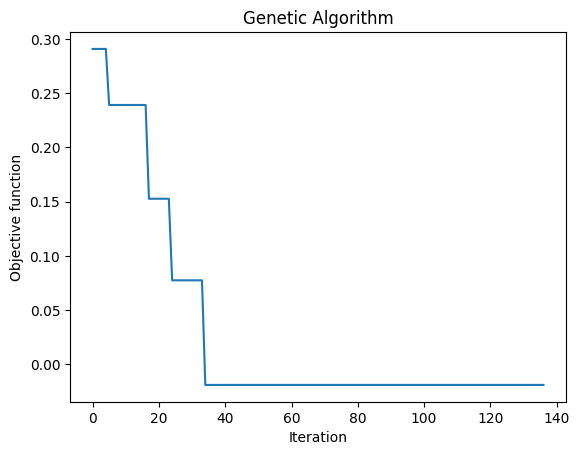

In [ ]:
from geneticalgorithm import geneticalgorithm as GeneticAlgorithm
from sklearn.linear_model import LinearRegression


def fitness(individual):
    # Verifica se pelo menos uma coluna foi selecionada
    if sum(individual) == 0:
        # Caso contrário, retorna score 0
        return 1
    else:
        # Cria um objeto LinearRegression
        reg = LinearRegression()
        # Ajusta o modelo aos dados de treino considerando apenas as colunas selecionadas pelo indivíduo
        reg.fit(X_train[:, individual == 1], y_train)
        # Avalia o modelo nos dados de teste considerando apenas as colunas selecionadas pelo indivíduo
        score = reg.score(X_test[:, individual == 1], y_test)
        # Retorna o score como uma tupla (o uso da vírgula é para indicar que se trata de uma tupla com um único elemento)
        return score


# Define os parâmetros do algoritmo genético
POP_SIZE = 50 # tamanho da população
GEN_SIZE = X.shape[1] # número de gerações
MUT_PROB = 0.01 # probabilidade de mutação

# Definindo o dicionário de parâmetros do algoritmo
params = {  'population_size': POP_SIZE,
            'num_generations': GEN_SIZE,
            'mutation_probability': MUT_PROB,
            'max_iteration_without_improv': 100,
            'parents_portion': 0.5,
            'elit_ratio': 0.1,
            'crossover_type': 'uniform',
            'crossover_probability': 0.1,
            'max_num_iteration': 10000}

ga = GeneticAlgorithm(
    function=fitness,
    dimension=X.shape[1],
    variable_type='bool',
    function_timeout=10,
    algorithm_parameters=params
)

ga.run()

A saída do código mostra a melhor solução encontrada pelo algoritmo genético, representada como um vetor de zeros e uns, onde cada posição indica se a coluna correspondente deve ser incluída ou não no modelo. No caso, a melhor solução encontrada inclui apenas a quarta coluna (índice 3) e exclui as demais

Além disso, a saída mostra o valor da função objetivo para essa melhor solução. Nesse caso, a função objetivo é o score do modelo de regressão linear nos dados de teste usando apenas as colunas selecionadas pelo algoritmo genético. O valor negativo desse score (-0.019) sugere que o modelo não é muito bom em prever os valores de saída para os dados de teste.

Neste caso, podemos usar essas informações para selecionar as colunas relevantes do seu conjunto de dados e ajustar um modelo de regressão linear usando apenas essas colunas. No entanto, é importante notar que o modelo ajustado pode não ser muito preciso, como sugerido pelo score negativo. Nesse caso poderia tentar outras abordagens para selecionar as colunas mais relevantes ou ajustar modelos mais complexos que possam lidar com interações entre as variáveis.

### Problemas de algoritmos genéticos:

- O processo para definir um algoritmo genético é extremamente complexo;
- Para melhores resultados o ideal é a utilização de redes neurais;
- A utilização de redes neuris em algoritmos genéticos geralmente exige uma quantidade de processamento consideravelmente elevada, o que resulta em longos períodos de processamento.

### 1.3 - Lógica Fuzzy
A lógica fuzzy é uma técnica de IC que permite lidar com incertezas e imprecisões em dados. Ela é usada para representar conceitos que não possuem limites definidos, como "alto" e "baixo". Na lógica fuzzy, um valor pode pertencer parcialmente a um conjunto, em vez de ser uma clara "verdade" ou "falso" como na lógica tradicional. A lógica fuzzy é frequentemente usada para modelagem de sistemas, tomada de decisões e controle de processos.

# 2 - Métodos Estatísticos:

Os métodos estatísticos são um conjunto de técnicas matemáticas usadas para análise de dados. Eles são usados em diversas áreas, como ciências sociais, biologia, finanças e engenharia, para extrair informações de dados e fazer inferências sobre populações e processos.

### 2.1 - Análise exploratória de dados:
A análise exploratória de dados é uma etapa inicial na análise estatística de dados. Ela envolve a visualização e a descrição dos dados, para entender sua distribuição, tendências, padrões e valores atípicos. A análise exploratória de dados ajuda a identificar problemas nos dados, selecionar técnicas de análise apropriadas e comunicar resultados de forma clara.

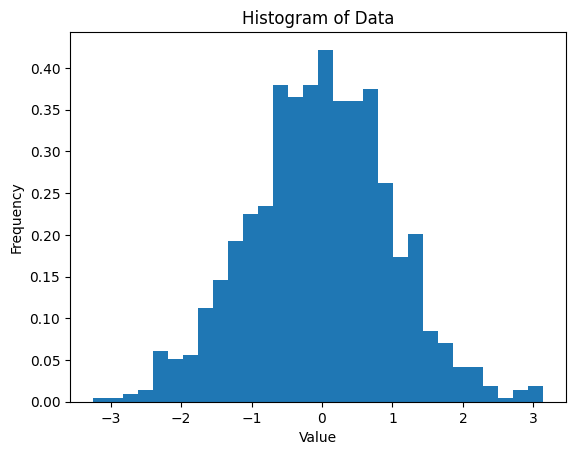

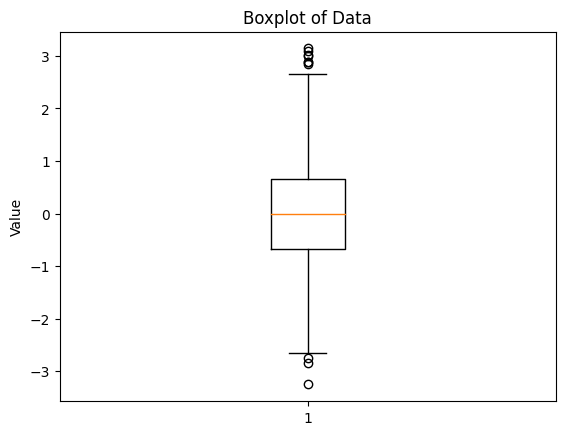

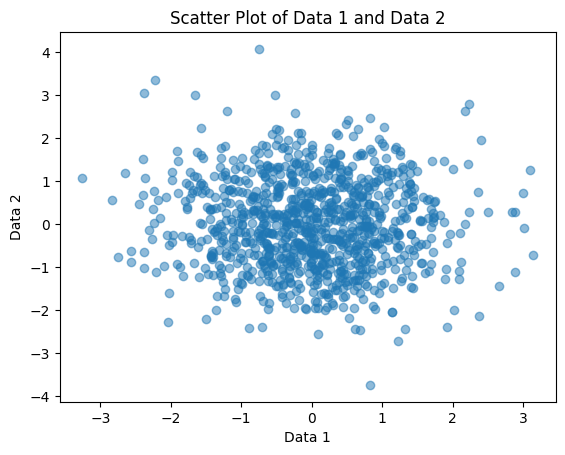

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Criação de um conjunto de dados
data = np.random.normal(loc=0.0, scale=1.0, size=1000)

# Histograma dos dados
plt.hist(data, bins=30, density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# Boxplot dos dados
plt.boxplot(data)
plt.ylabel('Value')
plt.title('Boxplot of Data')
plt.show()

# Gráfico de dispersão de dois conjuntos de dados
data2 = np.random.normal(loc=0.0, scale=1.0, size=1000)
plt.scatter(data, data2, alpha=0.5)
plt.xlabel('Data 1')
plt.ylabel('Data 2')
plt.title('Scatter Plot of Data 1 and Data 2')
plt.show()


### 2.3 - Inferência estatística:
A inferência estatística é usada para fazer generalizações sobre uma população com base em amostras de dados. Ela envolve a estimativa de parâmetros populacionais, como média e desvio padrão, a partir de amostras, e a realização de testes de hipóteses para avaliar se diferenças entre grupos são significativas.

In [ ]:
from scipy import stats

# Dados amostrais
data1 = [15, 17, 16, 18, 19, 14, 16, 16, 19, 17]
data2 = [18, 21, 19, 20, 22, 16, 17, 20, 21, 19]

# Teste t de Student para diferença entre médias
result = stats.ttest_ind(data1, data2)
print('t-Statistic:', result.statistic)
print('p-Value:', result.pvalue)


t-Statistic: -3.2902314167548643
p-Value: 0.004068071206191076


Os métodos estatísticos são uma ferramenta poderosa para análise de dados e tomada de decisões baseadas em evidências. Eles podem ser usados em conjunto com técnicas de IC, como algoritmos genéticos e lógica fuzzy, para criar modelos e sistemas mais robustos e precisos.

# 3 - Inteligência Computacional
A Inteligência Computacional (IC) é um campo interdisciplinar que envolve técnicas de aprendizado de máquina, processamento de linguagem natural, redes neurais artificiais e outras técnicas computacionais para resolver problemas complexos. A IC é frequentemente usada em mineração de dados para identificar padrões, classificar dados e tomar decisões baseadas em dados.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Carregamento dos dados
iris = load_iris()

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Treinamento do modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predição do modelo nos dados de teste
y_pred = clf.predict(X_test)

# Avaliação da acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


### 3.1 - Métodos de agrupamento:
Os métodos de agrupamento são usados para identificar grupos de objetos com base em suas características. Eles são usados em mineração de dados para segmentar clientes, agrupar genes com funções semelhantes e identificar clusters em dados geoespaciais. Os métodos de agrupamento incluem o k-means, o agrupamento hierárquico e o DBSCAN.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


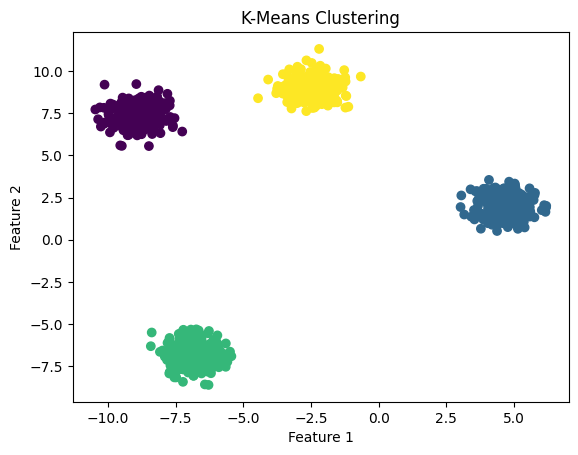

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Criação de um conjunto de dados com 4 clusters
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.6, random_state=42)

# Aplicação do algoritmo k-means
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Visualização dos resultados
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


A combinação de técnicas estatísticas e de IC permite a criação de sistemas inteligentes capazes de lidar com grandes volumes de dados e fornecer insights valiosos para tomada de decisões.

Concluindo,IC e os métodos estatísticos são duas áreas interdependentes que se complementam na mineração de dados. Enquanto a IC fornece as ferramentas para lidar com grandes volumes de dados e extrair padrões, a estatística fornece a fundamentação teórica e as técnicas para avaliar a significância desses padrões e construir modelos preditivos.



Referências:

Witten, I. H., Frank, E., & Hall, M. A. (2016). Data Mining: Practical Machine Learning Tools and Techniques. Morgan Kaufmann.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.